# Word Cloud Generation Using MapReduce Result
## I didn't use this method anymore becasue there are repeating work similar to using pre-defined vocabularies. This notebook is only used for demonstrating a different approach. MapReduce Application (Java) is under 'Tools' folder in root path as a reference.

In [2]:
%matplotlib inline
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [3]:
rdf=pd.read_csv('../00-data/wordcount.csv')
rdf.count()

word     10309
count    10309
dtype: int64

In [4]:
#nltk.download('punkt')
#nltk.download('stopwords')

In [5]:
stop_words = stopwords.words('english')
rdf["temp"] = [True  if row.word not in stop_words else False for index, row in rdf.iterrows()]
rdf = rdf[rdf.temp == True]
rdf.drop('temp', axis=1, inplace=True)
rdf.count()

word     10241
count    10241
dtype: int64

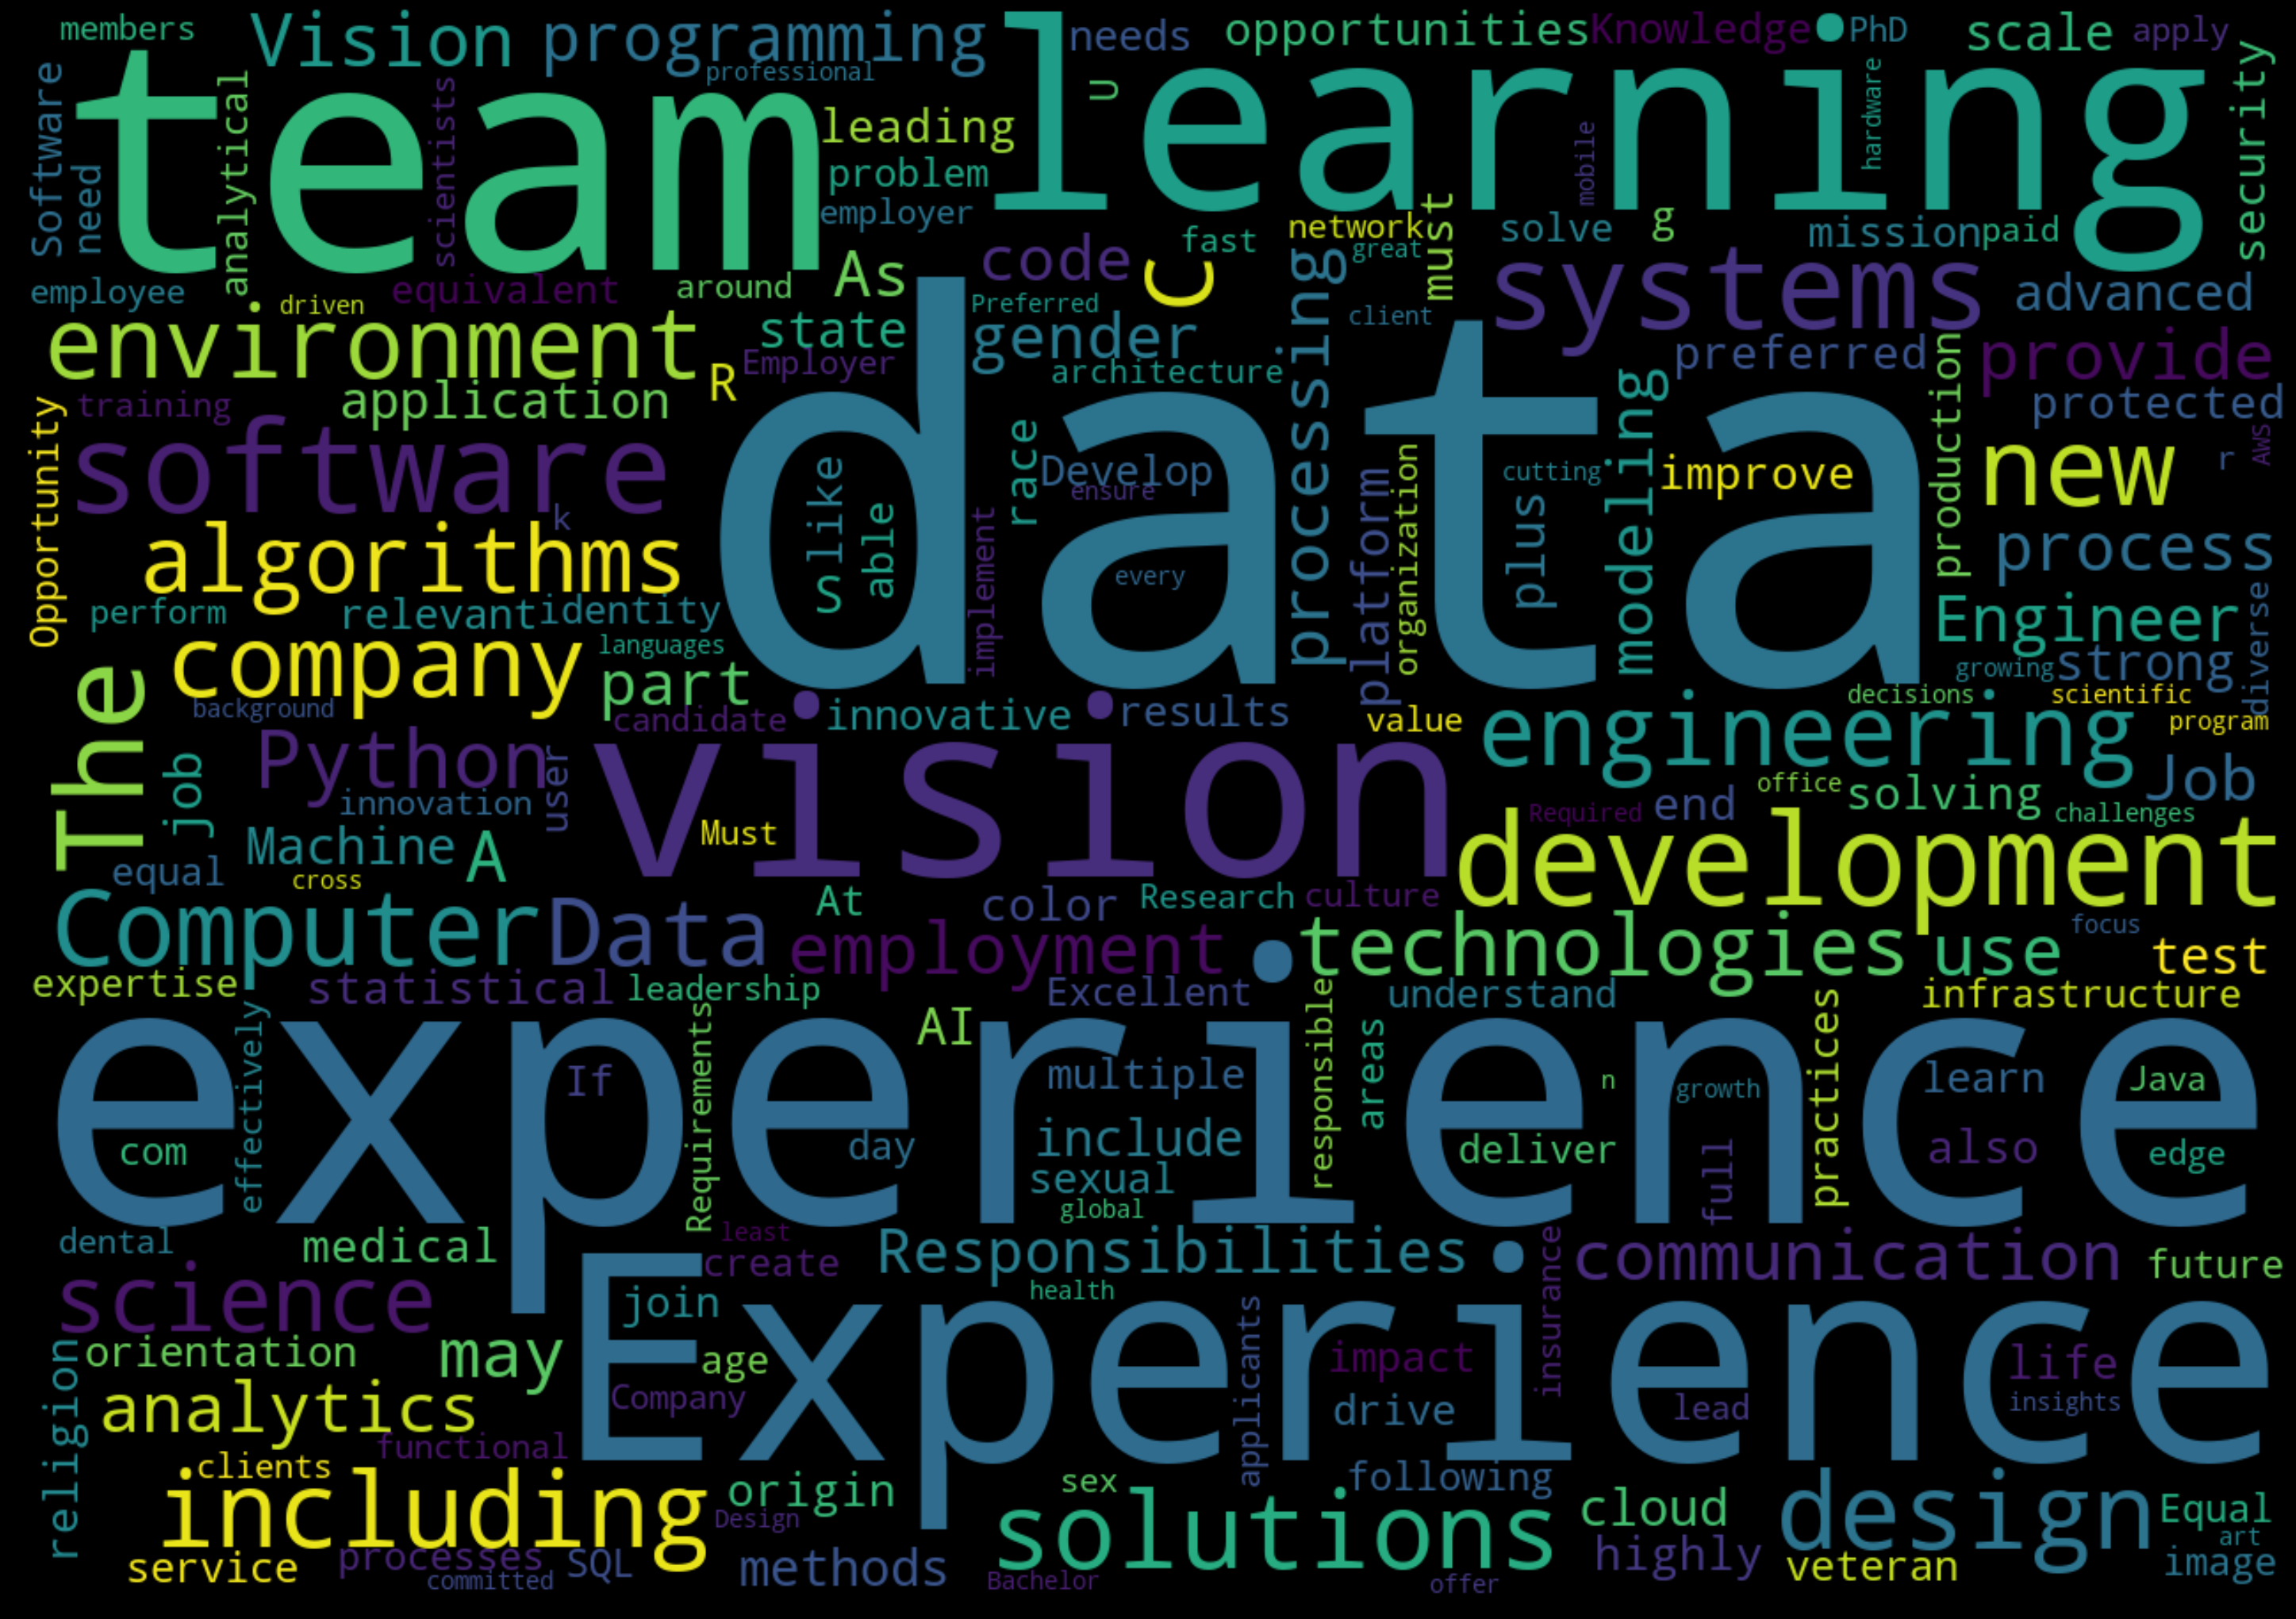

In [6]:
word_dict=pd.DataFrame(rdf.values.reshape(-1,2)).set_index(0).to_dict(orient='dict')[1]
wordcloud=WordCloud(width=1280, height=900, stopwords = stop_words).generate_from_frequencies(word_dict)

fig = plt.figure(
    figsize = (40,30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()